# <h1 style="color:SlateBlue; font-size: 34px"><center> Crime Analytics: Visualization of Incident Reports </h1></center>

First I will import the libraries and databases and give an overview of what we have

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
seattle = pd.read_csv('seattle_incidents_summer_2014.csv',low_memory=False)
sf = pd.read_csv('sanfrancisco_incidents_summer_2014.csv')

In [3]:
seattle.shape #32779 rows and 19 columns

(32779, 19)

In [4]:
seattle.columns

Index(['RMS CDW ID', 'General Offense Number', 'Offense Code',
       'Offense Code Extension', 'Offense Type', 'Summary Offense Code',
       'Summarized Offense Description', 'Date Reported',
       'Occurred Date or Date Range Start', 'Occurred Date Range End',
       'Hundred Block Location', 'District/Sector', 'Zone/Beat',
       'Census Tract 2000', 'Longitude', 'Latitude', 'Location', 'Month',
       'Year'],
      dtype='object')

** Ok, so lets see what are the most common Offense Type**

In [5]:
seattle['Offense Type'].value_counts().nlargest(5)

THEFT-CARPROWL                    6230
VEH-THEFT-AUTO                    2588
THEFT-OTH                         2221
PROPERTY DAMAGE-NON RESIDENTIA    1638
ASSLT-NONAGG                      1320
Name: Offense Type, dtype: int64

In [6]:
seattle['Summarized Offense Description'].value_counts().nlargest(5)

CAR PROWL          6230
OTHER PROPERTY     3755
BURGLARY           3212
VEHICLE THEFT      3057
PROPERTY DAMAGE    2365
Name: Summarized Offense Description, dtype: int64

In [7]:
#Is there any null values?
seattle.isnull().any()

RMS CDW ID                           False
General Offense Number               False
Offense Code                         False
Offense Code Extension               False
Offense Type                         False
Summary Offense Code                 False
Summarized Offense Description       False
Date Reported                        False
Occurred Date or Date Range Start    False
Occurred Date Range End               True
Hundred Block Location               False
District/Sector                       True
Zone/Beat                             True
Census Tract 2000                     True
Longitude                            False
Latitude                             False
Location                             False
Month                                False
Year                                 False
dtype: bool

# Bar Plot of the top 10 Offense Type and Summarized Offense Description

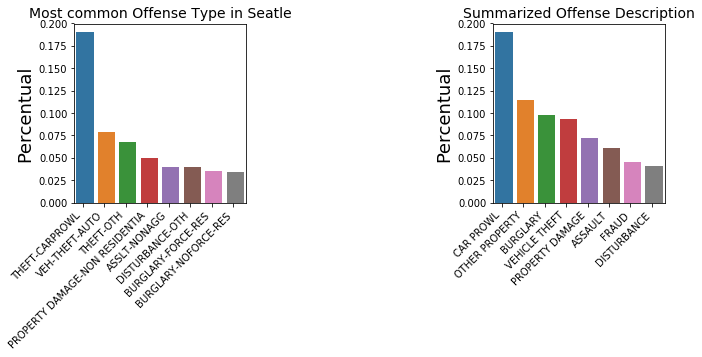

In [9]:
import matplotlib.gridspec as gridspec
gridspec.GridSpec(1,2) #(filas, coluna)
fig = plt.figure()

x1 = seattle['Offense Type'].value_counts().nlargest(8).index
y1 = seattle['Offense Type'].value_counts().nlargest(8)/len(seattle.index)
x2 = seattle['Summarized Offense Description'].value_counts().nlargest(8).index
y2 = seattle['Summarized Offense Description'].value_counts().nlargest(8)/len(seattle.index)

plt.subplot2grid((1,2),(0,0))
sns.barplot(x=x1,y=y1)
index=np.arange(8)
plt.xticks(index-0.1,rotation=45, horizontalalignment='right')
plt.title('Most common Offense Type in Seattle',fontsize=14)
plt.ylabel('Percentual', fontsize=18)

plt.subplot2grid((1,2),(0,1))
sns.barplot(x=x2,y=y2)
plt.title('Summarized Offense Description', fontsize=14)
plt.ylabel('Percentual', fontsize=18)
plt.xticks(index-0.1, rotation=45, horizontalalignment='right', fontsize=10)

fig.tight_layout()
fig.set_size_inches(w=12,h=7)


plt.show()

# Crimes by time of the Day

In [11]:
seattle['Occurred_Date'] = pd.to_datetime(seattle['Occurred Date or Date Range Start'])

morning = (seattle['Occurred_Date'].dt.hour > 6) & (seattle['Occurred_Date'].dt.hour <= 12)
afternoon = (seattle['Occurred_Date'].dt.hour > 12) & (seattle['Occurred_Date'].dt.hour <= 18)
evening =  (seattle['Occurred_Date'].dt.hour > 18) & (seattle['Occurred_Date'].dt.hour <= 23)
night = (seattle['Occurred_Date'].dt.hour <= 6)

In [12]:
morning = seattle[morning]
afternoon = seattle[afternoon]
evening = seattle[evening]
night = seattle[night]

** When are more crimes carried out? **

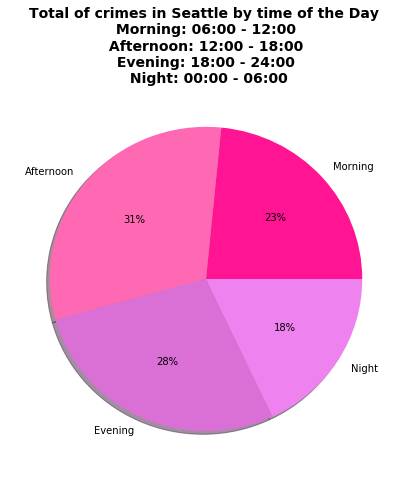

In [13]:
fig=plt.figure()
labels = ['Morning','Afternoon','Evening','Night']
values = [len(morning)/len(seattle),len(afternoon)/len(seattle),len(evening)/len(seattle),len(night)/len(seattle)]

plt.pie(values,labels=labels, autopct='%.0f%%',shadow=True, colors=['deeppink','hotpink','orchid','violet'])
plt.title('Total of crimes in Seattle by time of the Day \n Morning: 06:00 - 12:00 \n Afternoon: 12:00 - 18:00 \n Evening: 18:00 - 24:00 \n Night: 00:00 - 06:00', fontsize = 14,fontweight='bold')
fig.set_size_inches(w=7,h=7)

plt.show()

** Most crimes happen at the evening and at the night **

# Most Common Crimes for each time of the Day

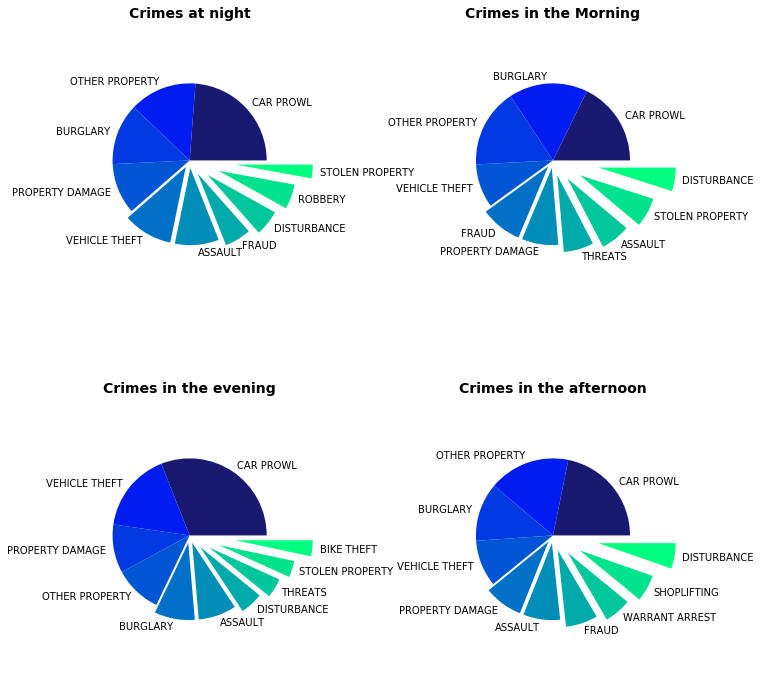

In [14]:
fig=plt.figure()
labels = ['Car Prowl', 'Other Property','Burglary','Property Damage','Vehicle Theft','Assault',
               'Fraud','Disturbance','Robbery','Stolen Property']
plt.subplot(2,2,1)
counts1 = night['Summarized Offense Description'].value_counts().nlargest(10)
plt.axis('equal')
explode = (0, 0, 0,0,0.1,0.1,0.2,0.3,0.4,0.6)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
#plt.pie(counts,labels=labels,colors=colors,explode=explode)
ax= counts1.plot(kind='pie', fontsize=10,colors=colors, explode=explode)
ax.set_ylabel('')

#plt.legend(labels=counts.index,  bbox_to_anchor=(1.7, 1))
plt.title('Crimes at night', fontsize = 14,fontweight='bold')

plt.subplot(2,2,2)
counts2 = morning['Summarized Offense Description'].value_counts().nlargest(10)
plt.axis('equal')
explode = (0, 0, 0,0,0.1,0.1,0.2,0.3,0.4,0.6)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
ax= counts2.plot(kind='pie', fontsize=10,colors=colors, explode=explode)
ax.set_ylabel('')
plt.title('Crimes in the Morning', fontsize = 14,fontweight='bold')

plt.subplot(2,2,3)
counts3 = evening['Summarized Offense Description'].value_counts().nlargest(10)
plt.axis('equal')
explode = (0, 0, 0,0,0.1,0.1,0.2,0.3,0.4,0.6)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
ax= counts3.plot(kind='pie', fontsize=10,colors=colors, explode=explode)
ax.set_ylabel('')
plt.title('Crimes in the evening', fontsize = 14,fontweight='bold')

plt.subplot(2,2,4)
counts4 = afternoon['Summarized Offense Description'].value_counts().nlargest(10)
plt.axis('equal')
explode = (0, 0, 0,0,0.1,0.1,0.2,0.3,0.4,0.6)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
ax= counts4.plot(kind='pie', fontsize=10,colors=colors, explode=explode)
ax.set_ylabel('')
plt.title('Crimes in the afternoon', fontsize = 14,fontweight='bold')
plt.tight_layout(pad=0.4, w_pad=1.2, h_pad=2.0)
fig.set_size_inches(w=10,h=10)

plt.show()

From this plot we can see that car prowl is the most common crime independent of the time.
But there exist some differences in the other crimes, like for example Burglary  is substantialy reduce at the evening, and highly increase in the morning.
shoplifting only appears in the top ten at afternoon. Also, Bike Theft only appears in the evening.

Now, lets pick two of the most common crimes: Car Prowl and Burglary

In [16]:
total_car_prowl = seattle.loc[seattle['Summarized Offense Description'] == 'CAR PROWL']
total_burglary = seattle.loc[seattle['Summarized Offense Description'] == 'BURGLARY']

car_prowl_m = morning['Summarized Offense Description'] == 'CAR PROWL'
car_prowl_a = afternoon['Summarized Offense Description'] == 'CAR PROWL'
car_prowl_e = evening['Summarized Offense Description'] == 'CAR PROWL'
car_prowl_n = night['Summarized Offense Description'] == 'CAR PROWL'

car_prowl_m = morning[car_prowl_m]
car_prowl_a = afternoon[car_prowl_a]
car_prowl_e = evening[car_prowl_e]
car_prowl_n = night[car_prowl_n]

burglary_m = morning['Summarized Offense Description'] == 'BURGLARY'
burglary_a = afternoon['Summarized Offense Description'] == 'BURGLARY'
burglary_e = evening['Summarized Offense Description'] == 'BURGLARY'
burglary_n = night['Summarized Offense Description'] == 'BURGLARY'

burglary_m = morning[burglary_m]
burglary_a = afternoon[burglary_a]
burglary_e = evening[burglary_e]
burglary_n = night[burglary_n]

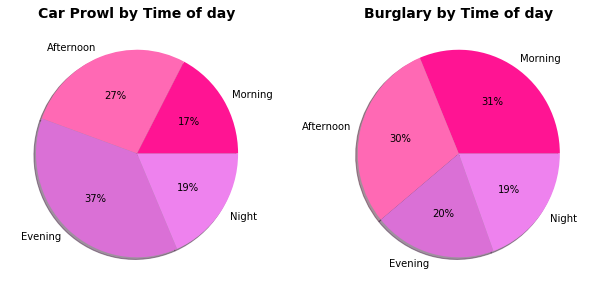

In [17]:
gridspec.GridSpec(1,2) #(filas, coluna)
fig = plt.figure()

labels = ['Morning','Afternoon','Evening','Night']
values1 = [len(car_prowl_m)/len(total_car_prowl),len(car_prowl_a)/len(total_car_prowl),len(car_prowl_e)/len(total_car_prowl),len(car_prowl_n)/len(total_car_prowl)]
values2 = [len(burglary_m)/len(total_burglary),len(burglary_a)/len(total_burglary),len(burglary_e)/len(total_burglary),len(burglary_n)/len(total_burglary)]
colors = ['deeppink','hotpink','orchid','violet']
plt.subplot2grid((1,2),(0,0))

plt.pie(values1,labels=labels, autopct='%.0f%%',shadow=True, colors= colors)
plt.title('Car Prowl by Time of day', fontsize = 14,fontweight='bold')

plt.subplot2grid((1,2),(0,1))
plt.pie(values2,labels=labels, autopct='%.0f%%',shadow=True, colors=colors)
plt.title('Burglary by Time of day', fontsize = 14,fontweight='bold')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
fig.set_size_inches(w=9,h=4)
plt.show()

Well, car prowl is more common at evening than morning. In contrast with Burglary, which is more common at morning and afternoon

# Now we can see some of this crimes in a map

In [19]:
total_car_prowl = seattle.loc[seattle['Summarized Offense Description'] == 'CAR PROWL']
total_burglary = seattle.loc[seattle['Summarized Offense Description'] == 'BURGLARY']

In [22]:
cp = total_car_prowl.loc[total_car_prowl['Latitude'] != 0]
b = total_burglary.loc[total_burglary['Latitude'] != 0]

In [52]:
car_p = cp[['Latitude', 'Longitude']]
car_p['color'] = 'r'
burg = b[['Latitude', 'Longitude']]
burg['color'] = 'b'

/home/lujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/lujan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
to_plot = pd.concat([car_p,burg])

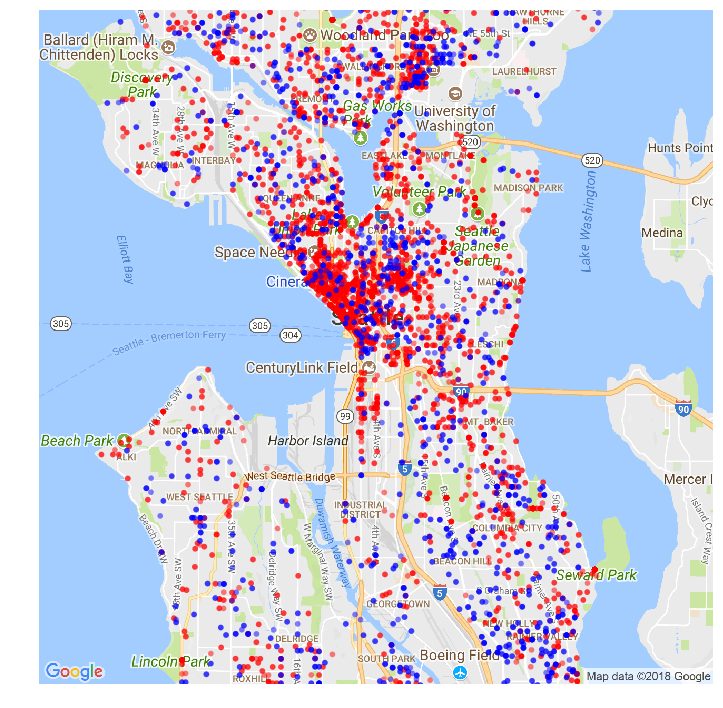

In [64]:
from mapsplotlib import mapsplot as mplt
mplt.register_api_key('My_key')
mplt.scatter(to_plot['Latitude'],to_plot['Longitude'],colors=to_plot['color'])
    

plt.show()

# Red dots are car prowl crimes and blue are burglary

Now we can plot a time series for Seattle and San Francisco to compare

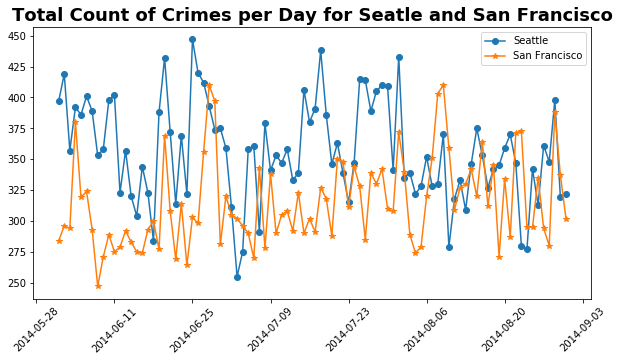

In [66]:
sf['Date'] = pd.to_datetime(sf['Date'])
seattle['dates']=seattle['Occurred_Date'].dt.date
ysf=sf['Date'].value_counts().sort_index()
xsf=sf['Date'].value_counts().sort_index().index
y=seattle['dates'].value_counts().sort_index()
x=seattle['dates'].value_counts().sort_index().index


plt.figure(figsize=(10,5))

plt.plot(x,y,'o-',xsf,ysf,'*-')
plt.legend(['Seattle','San Francisco'])
plt.title('Total Count of Crimes per Day for Seatle and San Francisco', fontsize=18, fontweight='bold')
plt.xticks(rotation=45)
plt.show()

** It seems like in general San Francisco have reported less quantity of crimes**